In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import ward, fcluster
from scipy.spatial.distance import pdist

In [2]:
data=pd.read_csv("enfermeria.csv")#Leemos el fichero csv

data=data.head(100)
# Utilizo 100 elementos dado que en el caso de que utilice todo el dataframe la funcion dendogram de la libreria scipy no funciona

In [3]:
#Guardamos los valores para dar nombre al dendograma mas tarde
recommendations=data[['recommendation']]

In [4]:
data['recommendation'].value_counts()

priority      47
not_recom     33
very_recom    18
recommend      2
Name: recommendation, dtype: int64

In [5]:
#Eliminamos la columna target del dataframe
data=data.drop('recommendation',axis=1)

In [6]:
data.columns

Index(['parents_occupation', 'childs_nursery', 'family_form',
       'number_children', 'housing_conditions', 'financial_standing',
       'social_conditions', 'health_conditions'],
      dtype='object')

In [7]:
#pasamos de variables categoricas a numericas
for var in data.columns:
    data[var]=data[var].astype('category')
    data[var]=data[var].cat.codes
data

,parents_occupation,childs_nursery,family_form,number_children,housing_conditions,financial_standing,social_conditions,health_conditions
0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,2,2
4,0,0,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...
95,0,0,0,1,1,0,2,0
96,0,0,0,1,1,0,1,2
97,0,0,0,1,1,0,1,1
98,0,0,0,1,1,0,1,0


In [8]:
data.info()#Missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   parents_occupation  100 non-null    int8 
 1   childs_nursery      100 non-null    int8 
 2   family_form         100 non-null    int8 
 3   number_children     100 non-null    int8 
 4   housing_conditions  100 non-null    int8 
 5   financial_standing  100 non-null    int8 
 6   social_conditions   100 non-null    int8 
 7   health_conditions   100 non-null    int8 
dtypes: int8(8)
memory usage: 928.0 bytes


# 1.Utiliza varias configuraciones para el modelo que más se adapte y teniendo en cuenta los tipos de distancias entre elementos. ¿Cuál es la k del modelo?

Comparaciones de los clusters

Scipy

In [9]:
#Representacion del dendograma mediante una matriz para poder comparar datos
distancia = ward(pdist(data))
distancia

array([[  0.        ,   1.        ,   1.        ,   2.        ],
       [  3.        ,   6.        ,   1.        ,   2.        ],
       [  4.        ,   7.        ,   1.        ,   2.        ],
       [  9.        ,  10.        ,   1.        ,   2.        ],
       [ 18.        ,  36.        ,   1.        ,   2.        ],
       [ 19.        ,  37.        ,   1.        ,   2.        ],
       [ 54.        ,  55.        ,   1.        ,   2.        ],
       [ 12.        ,  15.        ,   1.        ,   2.        ],
       [ 13.        ,  16.        ,   1.        ,   2.        ],
       [ 27.        ,  45.        ,   1.        ,   2.        ],
       [ 28.        ,  46.        ,   1.        ,   2.        ],
       [ 63.        ,  64.        ,   1.        ,   2.        ],
       [  2.        ,   8.        ,   1.        ,   2.        ],
       [  5.        ,  14.        ,   1.        ,   2.        ],
       [ 21.        ,  39.        ,   1.        ,   2.        ],
       [ 24.        ,  42

In [10]:
#Variamos la distancia para averiguar cuantos clusters diferentes se generan en el dendograma creado previamente
for i in range(1,10):
    print('Maxima distancia entre cluster: ',i)
    labels=fcluster(distancia, t=i, criterion='distance')
    #No se guardan los numeros repetidos
    labels=np.unique(labels)
    print(labels)

Maxima distancia entre cluster:  1
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]
Maxima distancia entre cluster:  2
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Maxima distancia entre cluster:  3
[1 2 3 4 5 6 7 8 9]
Maxima distancia entre cluster:  4
[1 2 3 4 5 6 7]
Maxima distancia entre cluster:  5
[1 2 3 4 5]
Maxima distancia entre cluster:  6
[1 2 3 4]
Maxima distancia entre cluster:  7
[1 2 3 4]
Maxima distancia entre cluster:  8
[1 2 3]
Maxima distancia entre cluster:  9
[1 2]


Podemos ver que la distancia de t=1 es demasiado pequeña dado que se generan muchos clusters, t=5 creo que es el punto optimo de la distancia dado que permite agrupar toda la informacion y por ultimo t=9 me parece demasiado dado que solo existen 2 clusters.
Teniendo en cuenta esto diria que k=5 dado que en t=5 hay 5 clusters.

sklearn

In [11]:
for i in range(1,10):
    print('Numero de cluster: ',i)
    cluster_jerarquico = AgglomerativeClustering(n_clusters = i)
    cluster_jerarquico.fit_predict(data)
    labels=np.unique(cluster_jerarquico.labels_)
    print(labels)

Numero de cluster:  1
[0]
Numero de cluster:  2
[0 1]
Numero de cluster:  3
[0 1 2]
Numero de cluster:  4
[0 1 2 3]
Numero de cluster:  5
[0 1 2 3 4]
Numero de cluster:  6
[0 1 2 3 4 5]
Numero de cluster:  7
[0 1 2 3 4 5 6]
Numero de cluster:  8
[0 1 2 3 4 5 6 7]
Numero de cluster:  9
[0 1 2 3 4 5 6 7 8]


Con la libreria sklearn a medida que aumenta el numero de clusters, aumenta el numero de clusters por lo que no se puede comparar nada. 

# 2. Dibuja un dendograma con los clústers obtenidos. Explica alguna de las relaciones interesantes que puedas encontrar.

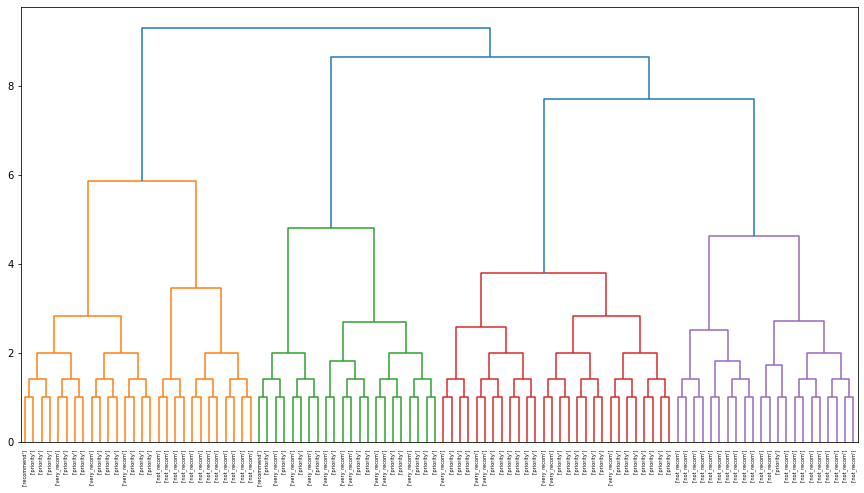

In [12]:
#pintamos el dendograma
plt.figure(figsize=(15, 8))
link = sch.linkage(data, 'ward')#utilizamos ward para que quede mejor representado
#utilizamos los valores de las recomendaciones ya que considero que es el objetivo del ejercicio
#saber si se puede recomendar a dicha persona.
dendograma = sch.dendrogram(link,labels=recommendations.values)


In [13]:
#Restablecememos las variables para poder sacar conclusiones
data=pd.read_csv("enfermeria.csv")#Leemos el fichero csv

data=data.head(100)

In [14]:
#Utilizando lo hablado anteriormente
clusters=fcluster(distancia, t=5, criterion='distance')

In [15]:
#Añadimos una columna donde queda indicado a que cluster pertenece cada individuo
data['Clusters']=clusters

In [16]:
#Opcion para mostrar todas las columnas
pd.options.display.max_rows = None

In [17]:
data.sort_values(by=['recommendation','Clusters','social_conditions','financial_standing'],ascending=True)

,parents_occupation,childs_nursery,family_form,number_children,housing_conditions,financial_standing,social_conditions,health_conditions,recommendation,Clusters
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom,2
56,usual,proper,complete,2,convenient,convenient,nonprob,not_recom,not_recom,2
11,usual,proper,complete,1,convenient,inconv,nonprob,not_recom,not_recom,2
65,usual,proper,complete,2,convenient,inconv,nonprob,not_recom,not_recom,2
8,usual,proper,complete,1,convenient,convenient,problematic,not_recom,not_recom,2
62,usual,proper,complete,2,convenient,convenient,problematic,not_recom,not_recom,2
17,usual,proper,complete,1,convenient,inconv,problematic,not_recom,not_recom,2
71,usual,proper,complete,2,convenient,inconv,problematic,not_recom,not_recom,2
5,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom,2
59,usual,proper,complete,2,convenient,convenient,slightly_prob,not_recom,not_recom,2


* Podemos ver que en todos los casos en los que recommendation es very_recom coincide con que las condiciones de salud son recommended ademas en casi todos los casos coinciden que pertenecen al cluster 3 o 4.
* Por el contrario tambien podemos ver en el caso de que la columna recommendation sea not_recom perteneceran al cluster 2 o 5, ademas en este caso tambien coincidira como la columna health_conditions sea not_recom

# Referencias
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.ward.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html